# Import Packages and Dataset

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import statistics

example_csv = "https://raw.githubusercontent.com/nogibjj/ids706_project9_ll442/4912522c139e982753fcd51a5226ad58ab5c3195/OccupationalEmploymentandWageStatistics.csv"

# Read the Dataset

In [118]:
general_df = pd.read_csv(example_csv)
assert general_df is not None

# Show basic property of the dataset

The first five rows


In [119]:
general_df.head()

,Area,Time Period,Occupation,Occupation Code,Industry,Employment,10th %,25th %,Entry level,Median,Mean,Experienced,75th %,90th %
0,North Carolina,2022,Management,110000,"Total, All Industries","285,550","$52,280","$75,480","$60,590","$104,240","$126,640","$159,180","$158,220","$208,000"
1,North Carolina,2022,Business and Financial Operations,130000,"Total, All Industries","302,740","$41,600","$53,990","$46,310","$74,530","$82,730","$100,670","$100,330","$132,610"
2,North Carolina,2022,Computer and Mathematical,150000,"Total, All Industries","172,210","$49,880","$68,990","$57,450","$102,370","$104,530","$127,710","$133,200","$164,980"
3,North Carolina,2022,Architecture and Engineering,170000,"Total, All Industries","68,190","$46,350","$60,940","$51,120","$79,560","$85,090","$101,820","$102,170","$130,970"
4,North Carolina,2022,"Life, Physical, and Social Science",190000,"Total, All Industries","41,840","$38,800","$50,010","$43,640","$64,470","$74,320","$89,440","$86,070","$120,640"


The last five row

In [120]:
general_df.tail()

,Area,Time Period,Occupation,Occupation Code,Industry,Employment,10th %,25th %,Entry level,Median,Mean,Experienced,75th %,90th %
17,North Carolina,2022,"Farming, Fishing, and Forestry",450000,"Total, All Industries","7,300","$23,140","$29,170","$25,440","$35,500","$38,270","$44,590","$45,290","$57,200"
18,North Carolina,2022,Construction and Extraction,470000,"Total, All Industries","184,660","$30,710","$36,620","$32,900","$45,330","$47,720","$55,020","$55,480","$69,240"
19,North Carolina,2022,"Installation, Maintenance, and Repair",490000,"Total, All Industries","192,530","$30,010","$37,600","$32,990","$48,420","$52,160","$61,600","$62,270","$78,280"
20,North Carolina,2022,Production,510000,"Total, All Industries","326,780","$26,390","$30,730","$27,670","$37,270","$41,140","$47,770","$47,680","$61,430"
21,North Carolina,2022,Transportation and Material Moving,530000,"Total, All Industries","455,770","$23,250","$29,010","$25,520","$34,600","$38,520","$44,920","$43,840","$57,610"


In [121]:
general_df.columns

Index(['Area', 'Time Period', 'Occupation', 'Occupation Code', 'Industry',
       'Employment', '10th %', '25th %', 'Entry level', 'Median', 'Mean',
       'Experienced', '75th %', '90th %'],
      dtype='object')

In [122]:
general_df.shape

(22, 14)

In [123]:
general_df['Employment'].describe()

count          22
unique         22
top       285,550
freq            1
Name: Employment, dtype: object

In [124]:
general_df['Entry level'].describe()

count          22
unique         22
top       $60,590
freq            1
Name: Entry level, dtype: object

In [125]:
general_df['Experienced'].describe()

count           22
unique          22
top       $159,180
freq             1
Name: Experienced, dtype: object

# Convert Data in CSV file to Integer to Make it Processable

In [126]:
myHash = defaultdict(list)
meanHash = defaultdict()
maxHash = defaultdict()
minHash = defaultdict()

columns = ['10th %', '25th %', 'Entry level', 'Median', 'Mean', 'Experienced', '75th %', '90th %']
for column in columns:
  for i in range(len(general_df['Entry level'])):
    # print(column)
    cur_int = int(general_df[column][i][1:].replace(",", "").replace(".", "").replace("$", ""))
    myHash[column].append(cur_int)
  meanHash[column] = int(statistics.mean(myHash[column]))
  maxHash[column] = int(max(myHash[column]))
  minHash[column] = int(min(myHash[column]))
print(myHash)
print(meanHash)
print(maxHash)
print(meanHash)
print(minHash)

defaultdict(<class 'list'>, {'10th %': [52280, 41600, 49880, 46350, 38800, 31670, 38750, 23850, 28700, 36990, 22030, 24050, 18120, 21800, 19880, 21300, 26860, 23140, 30710, 30010, 26390, 23250], '25th %': [75480, 53990, 68990, 60940, 50010, 39000, 50190, 32780, 36490, 50300, 25680, 29280, 21200, 24700, 22290, 24520, 31730, 29170, 36620, 37600, 30730, 29010], 'Entry level': [60590, 46310, 57450, 51120, 43640, 34470, 43580, 28260, 31130, 42940, 23370, 26320, 19400, 22980, 20670, 22410, 28320, 25440, 32900, 32990, 27670, 25520], 'Median': [104240, 74530, 102370, 79560, 64470, 48190, 70520, 47920, 51640, 66650, 31500, 38360, 26100, 29390, 28560, 32380, 38370, 35500, 45330, 48420, 37270, 34600], 'Mean': [126640, 82730, 104530, 85090, 74320, 51620, 102780, 52930, 66670, 87180, 33240, 42860, 28190, 31760, 33440, 47660, 41880, 38270, 47720, 52160, 41140, 38520], 'Experienced': [159180, 100670, 127710, 101820, 89440, 60060, 131940, 65080, 84180, 108970, 38110, 51010, 32520, 36090, 39730, 60090,

# Plot the values for different experience level

[30745, 39122, 33976, 51630, 59605, 72230, 70282, 95017]


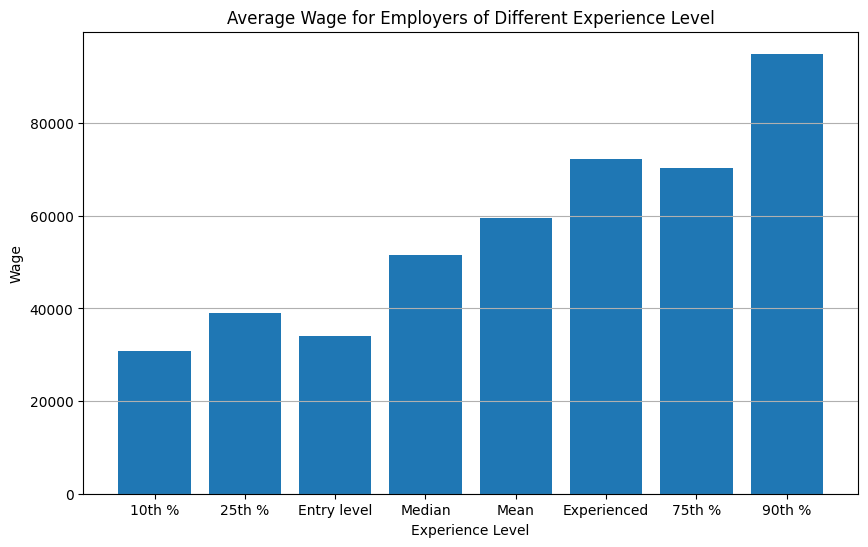

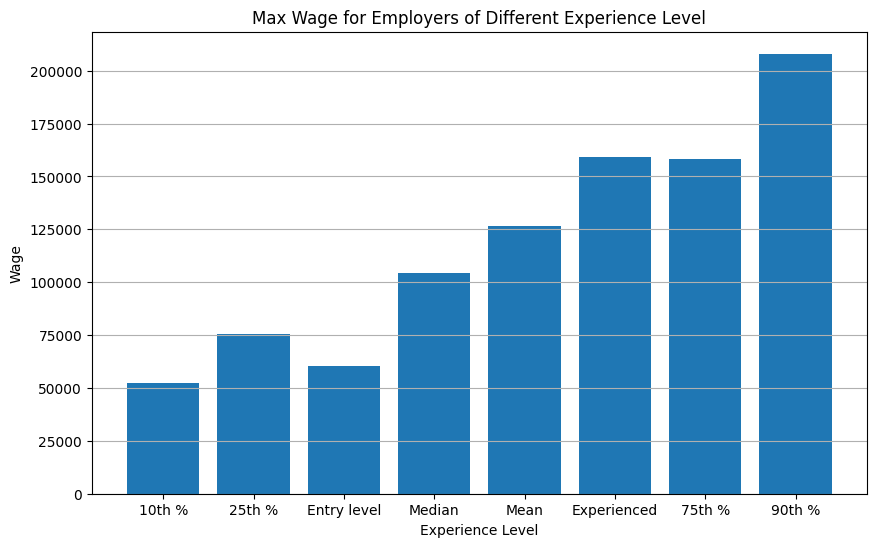

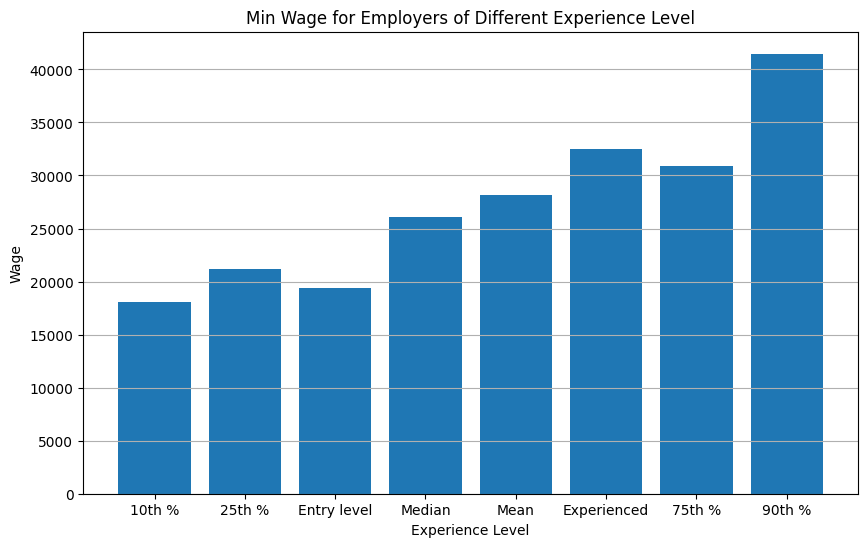

In [127]:
plt.figure(figsize=(10,6))

print(list(meanHash.values()))
plt.bar(columns, meanHash.values())  # You can adjust the number of bins as needed
plt.title('Average Wage for Employers of Different Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Wage')
plt.grid(axis = 'y')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(columns, maxHash.values())  # You can adjust the number of bins as needed
plt.title('Max Wage for Employers of Different Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Wage')
plt.grid(axis = 'y')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(columns, minHash.values())  # You can adjust the number of bins as needed
plt.title('Min Wage for Employers of Different Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Wage')
plt.grid(axis = 'y')
plt.show()